In [1]:
from src.workflow import Workflow
from src.utils_experiment import read_config, load_data
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'

In [3]:
# plt.ioff()
X, Y = load_data(dataset)
w = Workflow(X, Y, config=dataset, verbose=True)

In [4]:
#w.pca_plot_var_ratio(20)
w.reduce_dim(method='pca')

Using pca with the following params:
{
    "n_components": 10
}
Embedding created. Train MSE: 0.5090917


In [7]:
w.cluster(method='kmedoids')

Using kmedoids clustering with the following params:
{
    "metric": "cosine",
    "n_clusters": 14
}
Clustering complete.


Using umap with the following params:
{
    "dims": 2,
    "metric": "euclidean",
    "min_dist": 0.3,
    "n_neighbors": 16
}
Reducing dimensionality for visualization using umap.


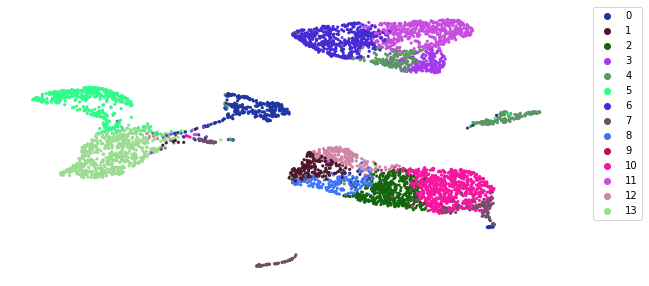

In [8]:
w.reduce_plot(labels=w.y_train_pred, method='umap')